# Lecture 14: General Normal Dist. and LOTUS Cont.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Point 1. General Normal Distribution

We know the following from last lecture:

* $Z \sim N(0, 1)$
* CDF(Z) = $\Phi$
* $E(Z) = 0$, from symmetry
* $Var(Z) = E(Z^2) = 1$

So, using the above can we derive the equation for a general normal distribution?

Well, for the general case we just simply shift our distribution by some mean $\mu$ and widen/squish the size of our distribution by a factor $\sigma$. Thus,

$$X = \mu + \sigma Z$$

$$\therefore X \sim N(\mu, \sigma^2)$$

Note as well that if the first equation above is true then $Z = \frac{X- \mu}{\sigma}$.

### Point 1.1 Prove the mean of a generalised Norm. Dist.

Through Linearity, 

$E(X) = E(\mu) + E(\sigma) E(Z) = E(\mu)$

Since the $E(Z) = 0$.

### Point 1.2 Prove the var of a generalised Norm. Dist.

Once again, $Var(X) = E((x - E(x))^2) = E(X^2) - E(X)^2$. This means,

$$Var(X) = Var(\mu + \sigma Z) = Var(\sigma Z)$$

Note that $\sigma$ is a constant, so we need to know its affect on the variance.

$$Var(cX) = E((cX - cE(X))^2) = c^2E((X - E(X))^2)$$
$$Var(cX) = c^2 Var(X)$$

Hence,

$$\therefore Var(X) = \sigma^2 Var(Z) = \sigma^2$$

### Point 1.3 Find CDF and PDF

Given the above, we can now think about what the CDF and PDF ought to be.

For the CDF, $P(X \leq x) = P(\frac{X - \mu}{\sigma} \leq \frac{x - \mu}{\sigma})$. Therefore:

$$\therefore P(X\leq x) = \Phi(\frac{X - \mu}{\sigma})$$

Thus, the PDF is equal to the differentiation of this function by X

$$\frac{d}{dx}\Phi(\frac{x - \mu}{\sigma}) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(X - \mu)^2}{2\sigma^2}}$$


NB:  68-95-99.7 rule: The likelihood of a rv falling between the central xth percent of a normal dist is the nth version of the rule where n is the std between 1 and 3.

In [2]:
def Norm(X, mu, sigma):
    return (1/np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(X - mu)**2/(2 * sigma**2))

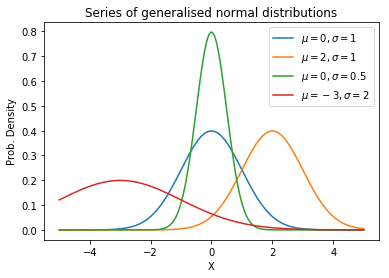

In [3]:
X = np.linspace(-5, 5, 200)

plt.plot(X, Norm(X, 0, 1), label="$\mu = 0, \sigma = 1$")
plt.plot(X, Norm(X, 2, 1), label="$\mu = 2, \sigma = 1$")
plt.plot(X, Norm(X, 0, 0.5), label="$\mu = 0, \sigma = 0.5$")
plt.plot(X, Norm(X, -3, 2), label="$\mu = -3, \sigma = 2$")
plt.title("Series of generalised normal distributions")
plt.xlabel("X")
plt.ylabel("Prob. Density")
plt.legend()
plt.show()

## Point 2. Law of the Unconscious Statistician (LOTUS) Continued.

### Point 2.1 Variance of Poisson

Let $X \sim \textrm{Poiss}(\lambda)$. It should be noted from before (I believe) that $E(X) = \lambda$.

To calculate $Var(X)$, we need to find $E(X^2)$ and $E(X)^2$, the latter is obviously $\lambda^2$.

So what is $E(X^2)$? Enter LOTUS!

$$E(X^2) = \sum_{k=0}^{\infty}k^2 \frac{e^{-\lambda}\lambda^k}{k!}$$

This sum is pretty hard but luckily we know that $e^\lambda = \sum_{k=0}^{\infty} \frac{\lambda^k}{k!}$

By taking the first differentiation, we get $e^\lambda = \sum_{k=0}^{\infty} \frac{k\lambda^{k-1}}{k!}$.

We can then reset the index by simply multiplying by k and we can start the index from either 1 or 0 because the 0th term is simply 0, $ke^\lambda = \sum_{k=1}^{\infty} \frac{k\lambda^{k}}{k!}$

This is not a little harder to differentiate a second time, but it's possible $k(ke^\lambda + e^\lambda) = e^\lambda k (\lambda + 1) = \sum_{k=1}^{\infty} \frac{k^2\lambda^{k}}{k!}$

We can substitute this into the equation above for $E(X^2)$ to get the result $e^{-\lambda}e^{\lambda}\lambda(1+\lambda)$

$$\therefore Var(X) = \lambda^2 + \lambda - \lambda^2 = \lambda$$